In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

## Loading Dataset

In [12]:
train_dir = r'C:\Users\DELL\Documents\Machine Learning\Deep Learning-T\Mask\Train'
validation_dir = r'C:\Users\DELL\Documents\Machine Learning\Deep Learning-T\Mask\Validation'
test_dir = r'C:\Users\DELL\Documents\Machine Learning\Deep Learning-T\Mask\Test'

# Dataset consits of mask and without mask people images

In [22]:
print(len(train_dir))

67


## Data Augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.3,
    zoom_range=0.3
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [20]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    class_mode='binary',
    batch_size=20
)

validation_data = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(128,128),
    class_mode='binary',
    batch_size=20
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## VGG19

In [26]:
from tensorflow.keras.applications import VGG19

In [28]:
## Using preprocessed Architecture
conv_base = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(128,128,3),
)

In [30]:
## Form fully connected network
from tensorflow.keras import models,layers

In [31]:
model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(255,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 255)               2089215   
                                                                 
 dense_1 (Dense)             (None, 128)               32768     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22,146,496
Trainable params: 22,146,496
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'],)

In [34]:
checkpoint = keras.callbacks.ModelCheckpoint('Best Model-{epoch:02d}.h5',
                                            save_best_only=True)

In [38]:
trained = model.fit(
    train_data,
    steps_per_epoch=50,
    epochs=3,
    validation_data = validation_data,
    validation_steps=40,
    callbacks=[checkpoint]
)

Epoch 1/3
50/50 [==============================] - 228s 5s/step - loss: 0.0416 - acc: 0.9890 - val_loss: 0.0155 - val_acc: 0.9950
Epoch 2/3
50/50 [==============================] - 230s 5s/step - loss: 0.0402 - acc: 0.9870 - val_loss: 0.0131 - val_acc: 0.9962
Epoch 3/3
50/50 [==============================] - 227s 5s/step - loss: 0.0276 - acc: 0.9890 - val_loss: 0.0403 - val_acc: 0.9825


In [41]:
import matplotlib.pyplot as plt
import numpy as np

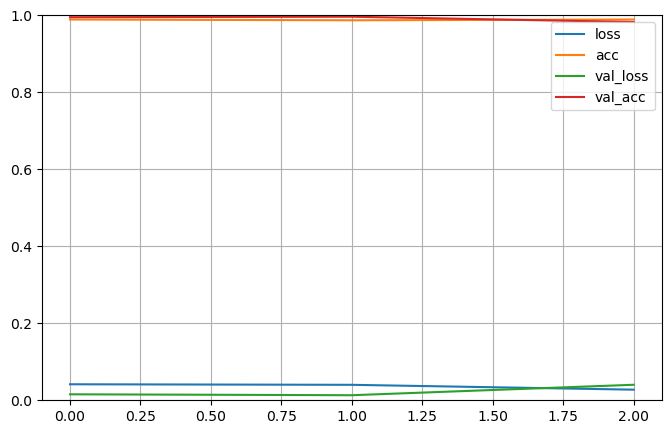

In [44]:
pd.DataFrame(trained.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
model1 = keras.models.load_model('Best Model-01.h5')

In [47]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128,128),
    batch_size=31,
    class_mode = 'binary'
)

Found 984 images belonging to 2 classes.


In [48]:
model1.evaluate(test_data) # Evaluate Model

32/32 [==============================] - 34s 1s/step - loss: 0.0166 - acc: 0.9949


[0.016590172424912453, 0.994918704032898]